In [1]:
import numpy as np
from mcm import EcModel

reference= 'eclogitization_mafic_simple'

In [2]:
phases = [
    'Clinopyroxene',
    'Orthopyroxene',
    'Quartz',
    'Feldspar', 
    'Garnet', 
    'Kyanite',
]

ems = [
    'Diopside', 'Hedenbergite', 'Clinoenstatite', 'CaTschermaks', 'Jadeite',
    'Enstatite', 'Ferrosilite', 'MgTschermaks', 'OrthoDiopside',
    'Quartz',
    'Anorthite','Albite',
    'Pyrope', 'Almandine', 'Grossular', 'MgMajorite', 'NaMajorite',
    'Kyanite'
]

# Hacker and Abers 2003
# Garnet-Granulite facies, vol%
phii0 = [
    0.185, # cpx
    0.185, # opx
    0.00, # quartz
    0.35, # feldspar
    0.28, # garnet
    0.0, # kyanite
 ]

Xik0 = [
    [0.28, 0.61, 0., 0., 0.11], # di, hed, *cEn, *cats, jd
    [0.5, 0.5, 0., 0.], # en, fs, *mats, *oDi
    [1.], # quartz
    [0.43, 0.57], # an, ab
    [0.36, 0.46, 0.18, 0., 0.], # py, alm, gr, *mgmaj, *namaj
    [1.], # kyanite
]

../database/install/eclogitization_agu2_slb_rx/lib/python3.8/site-packages/
[35.1950342264082, 36.12580408018787, 26.482921318472915, 26.770559705893803, 39.12844085201653, 36.63953752692472]
33.52001442234773
[0.25889294 0.64616878 0.         0.         0.09493828 0.43211501
 0.56788499 0.         0.         1.         0.44456067 0.55543933
 0.31883611 0.50303101 0.17813288 0.         0.         1.        ]

[0.185, 0.185, 0.0, 0.35, 0.28, 0.0]
1.0

[0.19424459 0.19938159 0.         0.27952541 0.32684841 0.        ]
1.0000000000000002
2.2982818450000195
(array(['Clinopyroxene_slb_ph', 'Orthopyroxene_slb_ph', 'Quartz_slb_ph',
       'Garnet_slb_ph'], dtype='<U20'), array(['cpx', 'opx', 'qtz', 'gt'], dtype='<U3'))


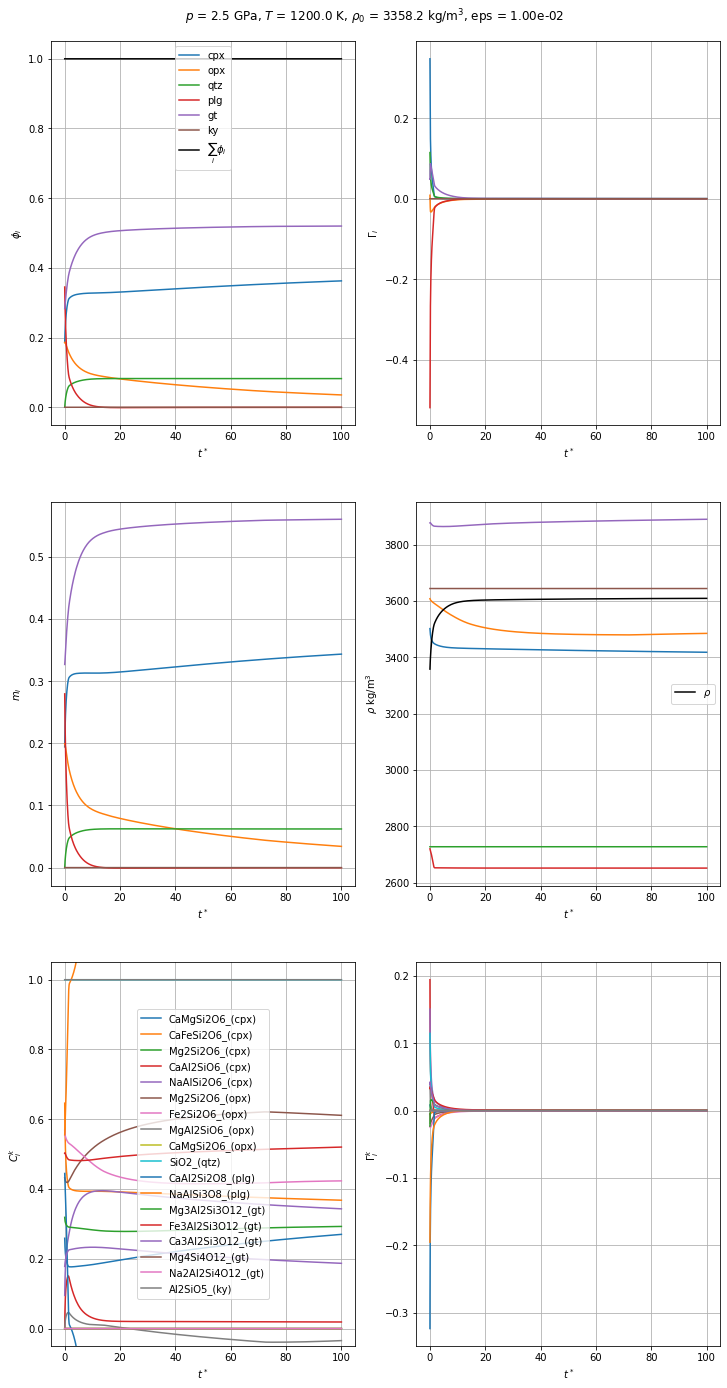

,Clinopyroxene_slb_ph,Orthopyroxene_slb_ph,Quartz_slb_ph,Feldspar_slb_ph,Garnet_slb_ph,Kyanite_slb_ph
Mode (initial),0.194245,0.199382,0.000000,0.279525,0.326848,0.0
Mode (final),0.343462,0.034146,0.062156,-0.000216,0.560451,0.0


(<py_eclogitization_agu2_slb_rx.eclogitization_agu2_slb_rx at 0x7fc29502a830>,
 <tcg_slb.phasediagram.base.PDReactiveGridDiagnostics at 0x7fc297853400>)

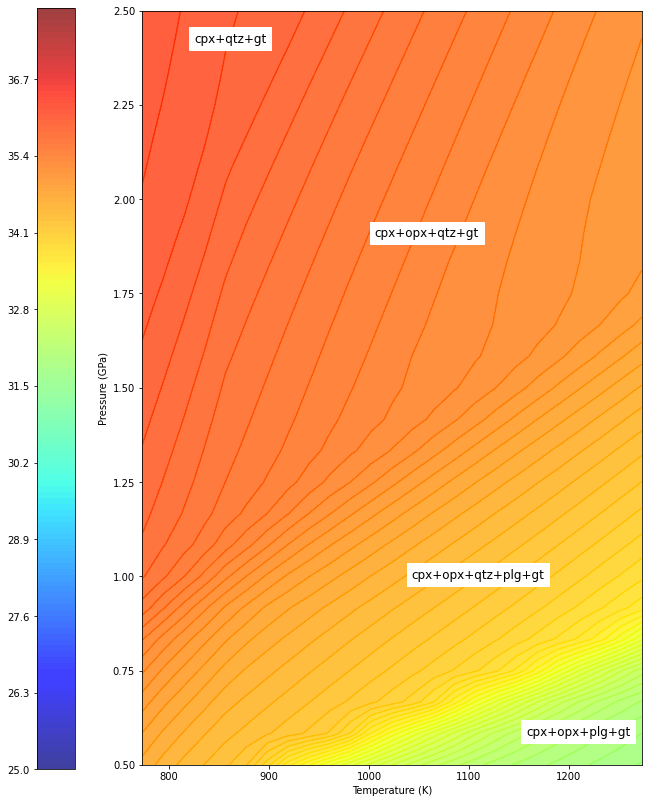

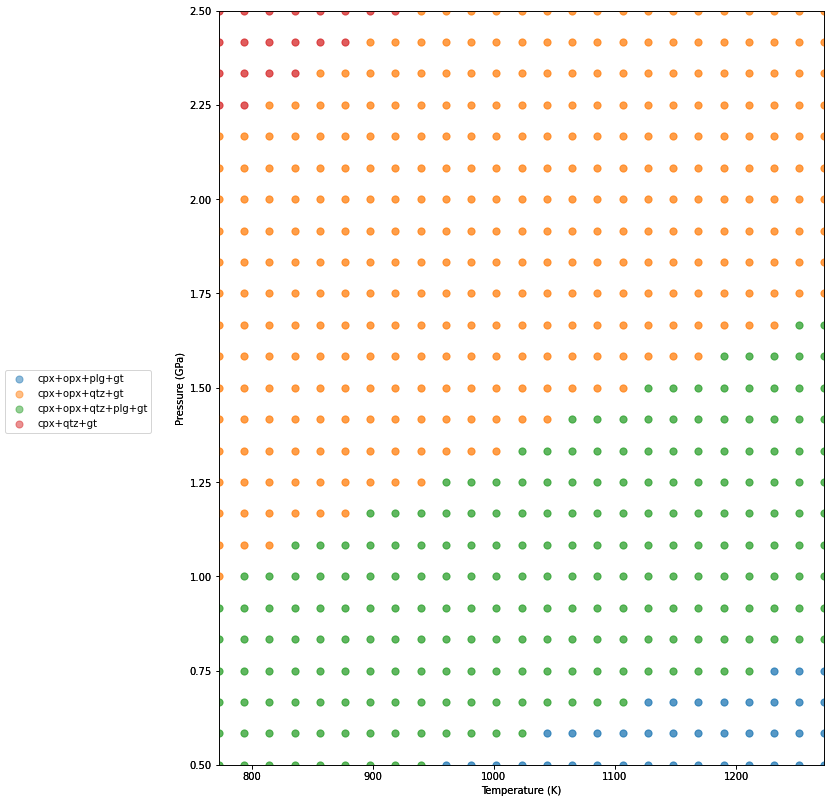

In [4]:
model = EcModel(
    reference,
    "eclogitization_agu2_slb_rx",
    phii0=phii0,
    Xik0=Xik0,
    nT=25,
    nP=25
)

model.run(reload=False,save=True,end_t=1e2)

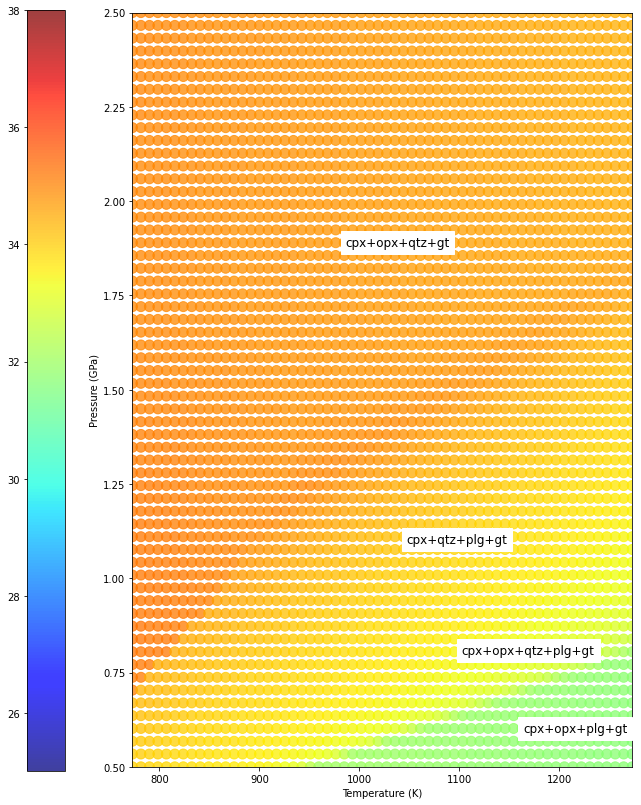

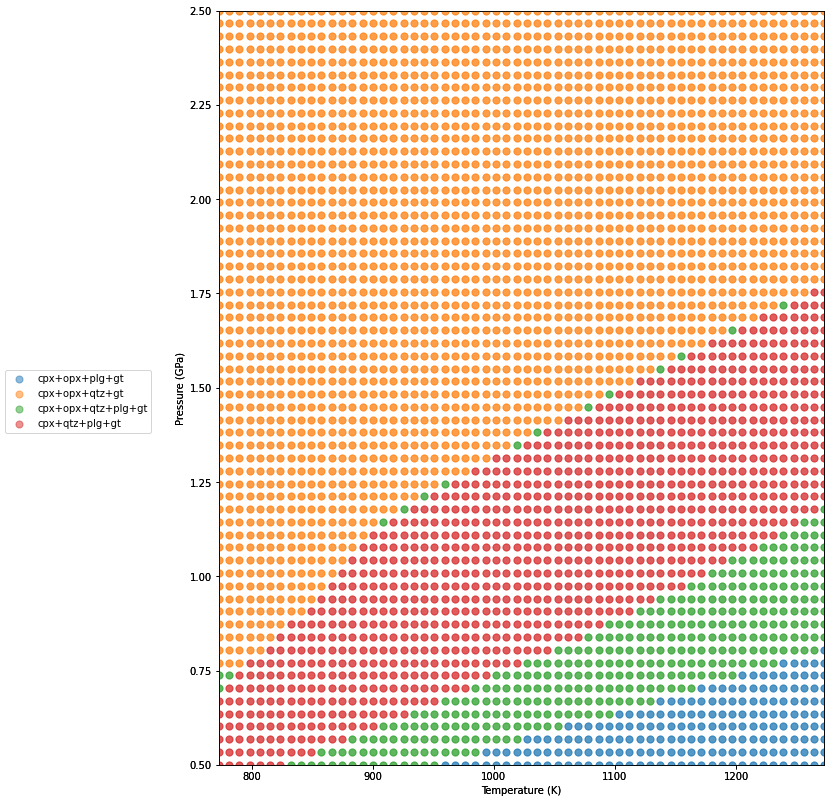

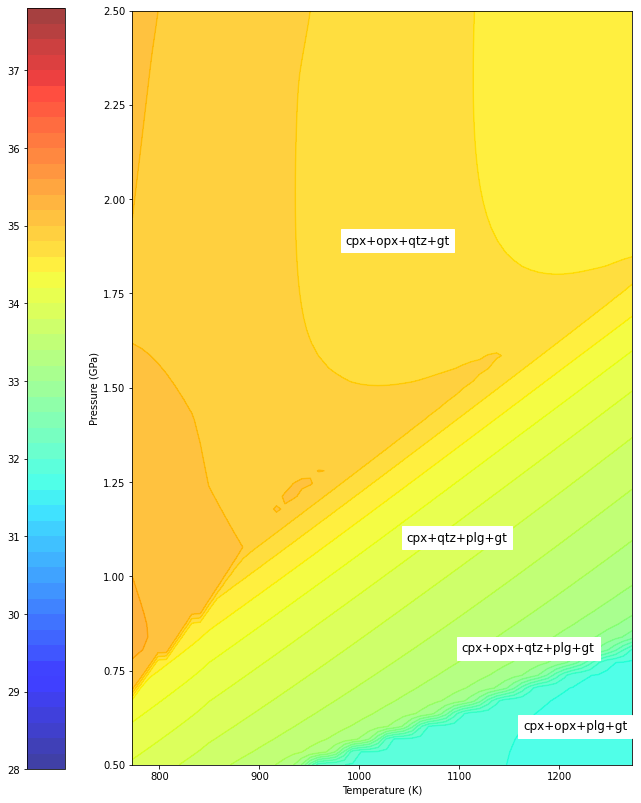

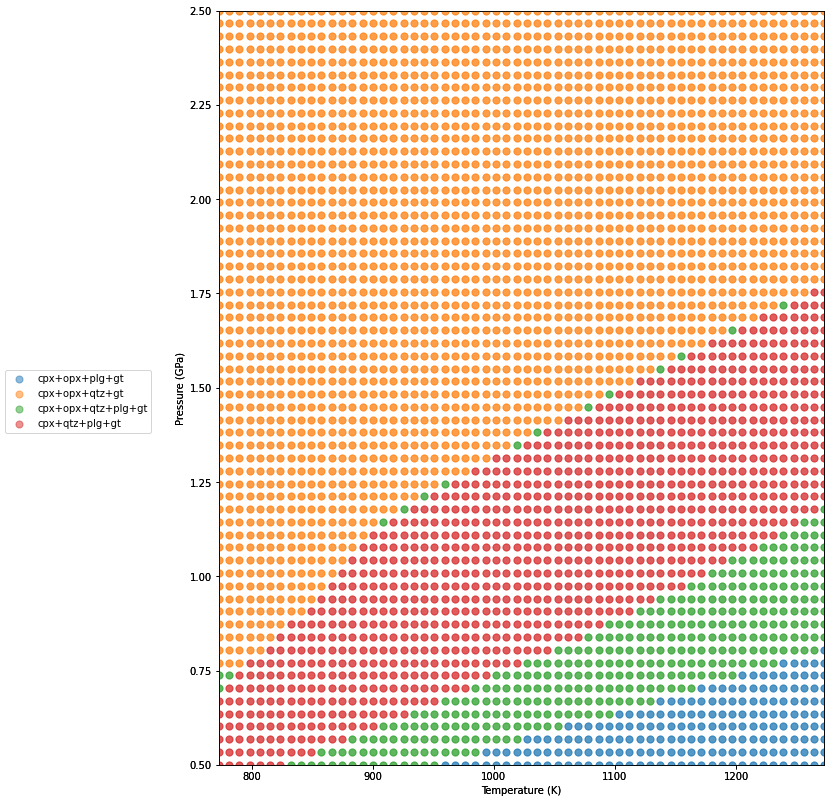

In [15]:
bdfdiag.plot_phases()
from matplotlib import pyplot as plt
plt.savefig('figs/mafic/hp62-pseudosection.pdf')

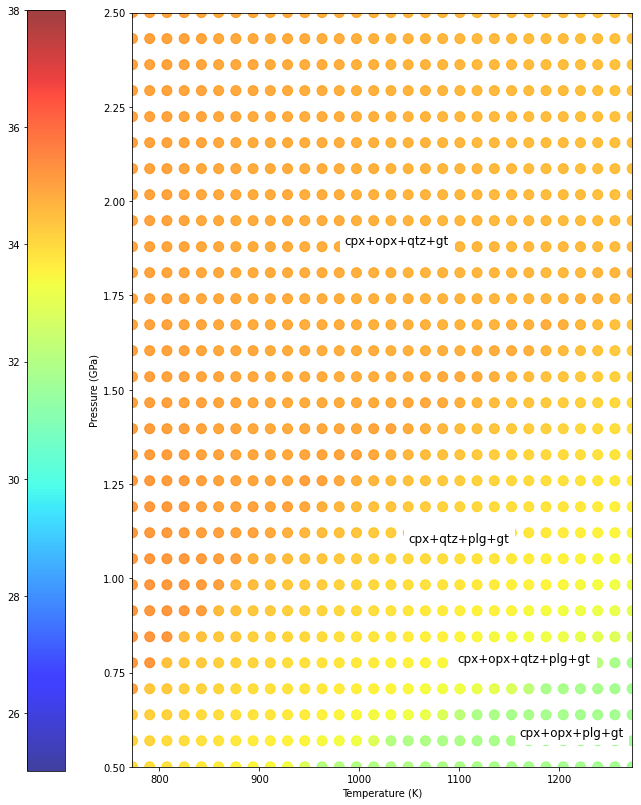

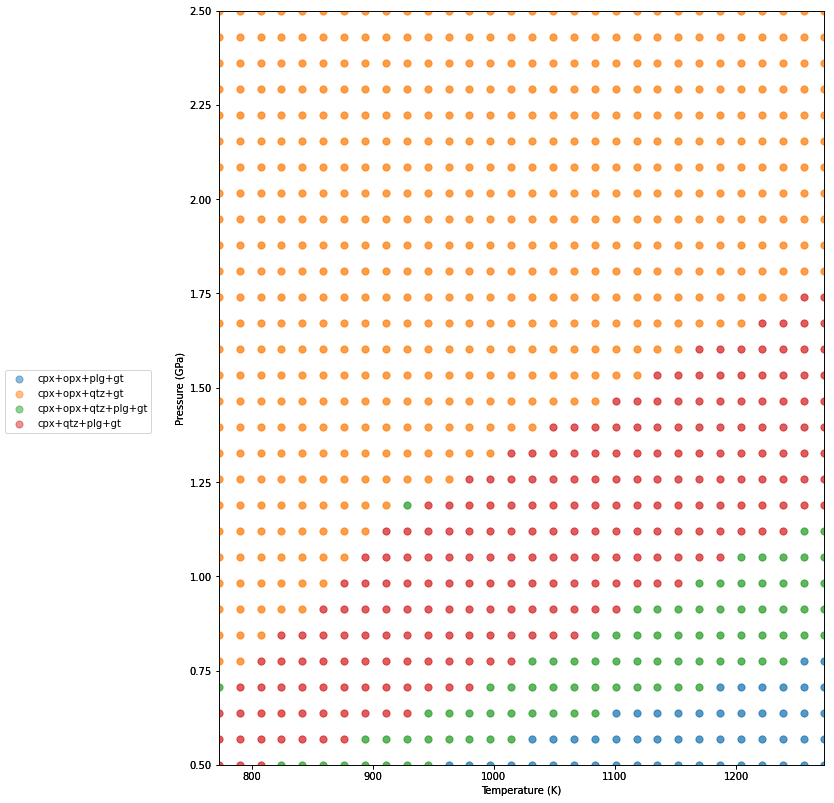

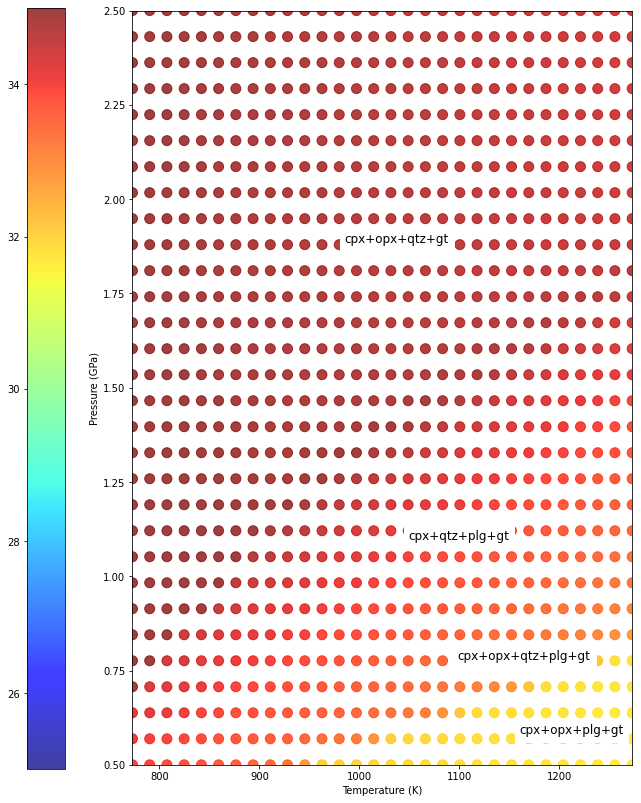

In [7]:
bdfdiag = mcm.plot_reaction_grid(
    rxn,
    grid,
    #figure_background="figures/hp62-density-cropped.png",
    figure_xlim=[Tmin, Tmax],
    figure_ylim=[Pmin, Pmax],
)

s=bdfdiag.plot_rho()
s.set_clim([25., 35.])
s.set_cmap('jet')
plt.savefig('figs/mafic/hp62-density.pdf')

In [ ]:
s=bdfdiag.plot_rho_contours()
plt.savefig('figs/mafic/hp62-density-contours.pdf')

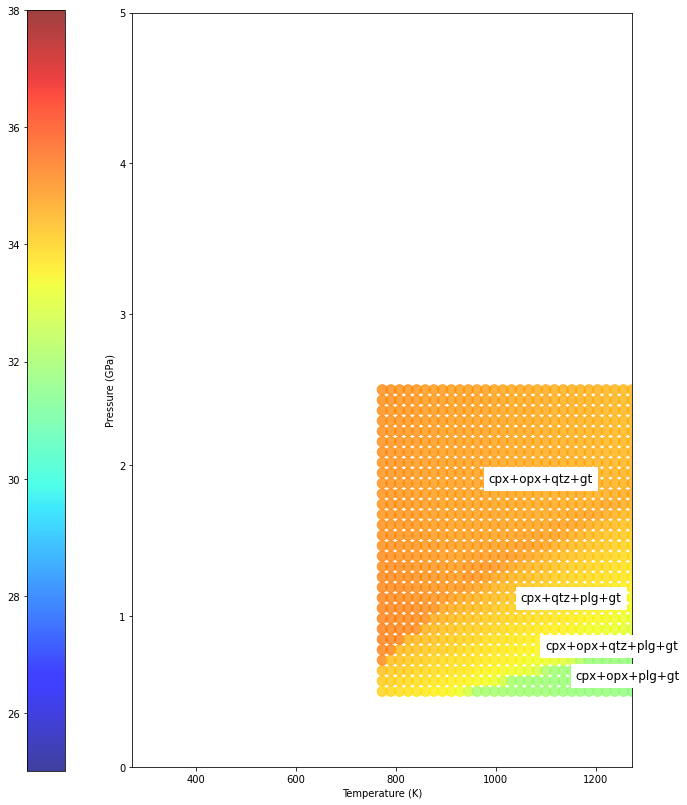

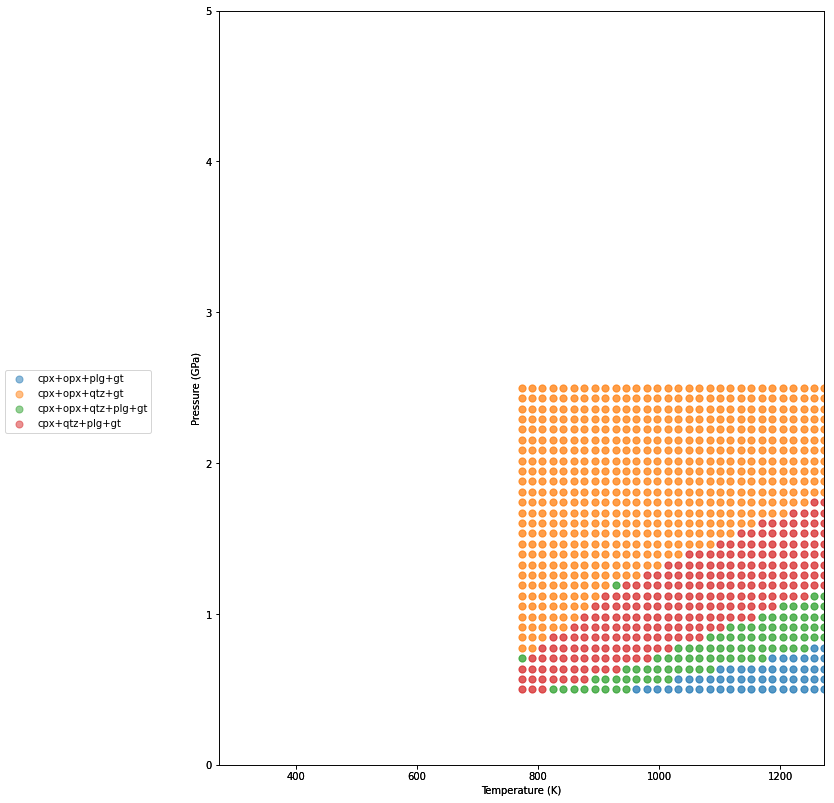

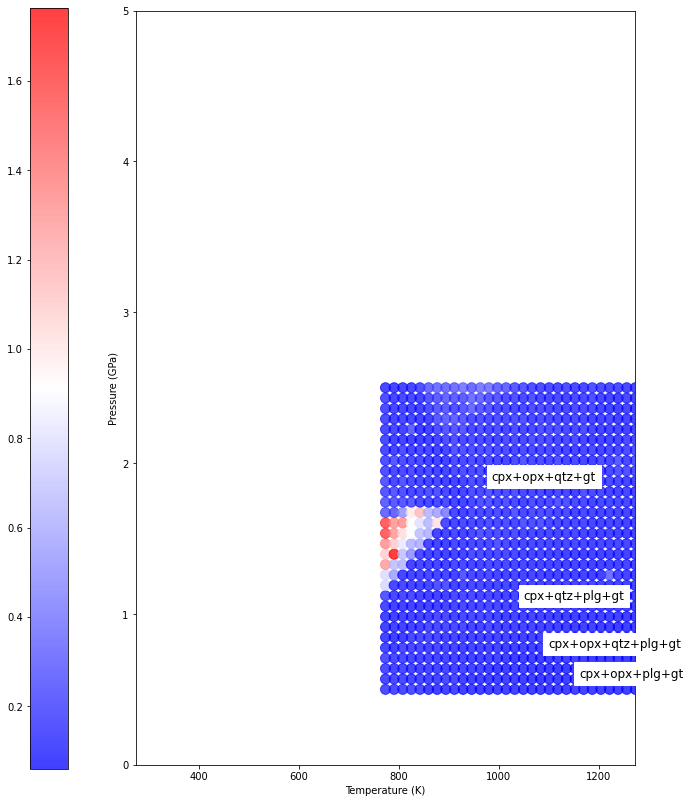

In [8]:
bdfdiag = mcm.plot_reaction_grid(rxn,grid)
bdfdiag.plot_stime()

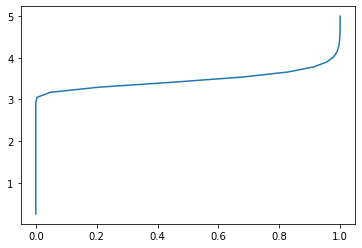

../database/install/eclogitization_agu_slb_rx/lib/python3.8/site-packages/


In [9]:
i0 = 2 # doesn't matter as long as you pass cik0
end = 10 # end time

bdfgrid = PDReactiveGrid()

Trange = [1000.]
Prange = np.linspace(0.25, 5.0, 40)
Dagrid = [[None for j in range(len(Trange))] for i in range(len(Prange))]
porosity = [[None for j in range(len(Trange))] for i in range(len(Prange))]

for i, p in enumerate(Prange):
    for j, t in enumerate(Trange):
        poro = (1.0 + np.tanh((p - 3.0)*3.0))/2 # 0 to 1
        Da_val = 0.0001 + ((poro)**10.)
        Dagrid[i][j] = Da_val
        porosity[i][j] = poro

Dagrid = np.asarray(Dagrid)

from matplotlib import pyplot as plt
plt.plot(Dagrid, Prange)
plt.show()

rxn = mcm.get_reaction("eclogitization_agu_slb_rx")


bdfgrid.solve(rxn, ScipyPDReactiveODE, i0, ['T', 'p'], Trange, Prange, end, Cik0=Cik0, mi0=mi0, Da=0.0001)
bdfdiag = PDReactiveGridDiagnostics(rxn,bdfgrid)
rho2 = bdfdiag.rhogrid()

bdfgrid.solve(rxn, ScipyPDReactiveODE, i0, ['T', 'p'], Trange, Prange, end, Cik0=Cik0, mi0=mi0, Da=10.0)
bdfdiag = PDReactiveGridDiagnostics(rxn,bdfgrid)
rho3 = bdfdiag.rhogrid()

bdfgrid.solve(rxn, ScipyPDReactiveODE, i0, ['T', 'p'], Trange, Prange, end, Cik0=Cik0, mi0=mi0, Da=Dagrid)
bdfdiag = PDReactiveGridDiagnostics(rxn,bdfgrid)
rho1 = bdfdiag.rhogrid()

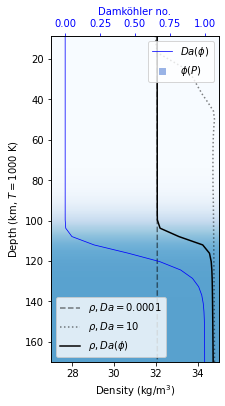

In [10]:
from matplotlib import pyplot as plt
fig, ax1 = plt.subplots(figsize=(3, 6))
im = ax1.imshow(porosity, cmap="Blues", extent=(20,50,0.25/3000/9.8*1e6,5.0/3000/9.8*1e6), origin="lower", alpha=1., interpolation='bilinear', aspect='auto')
im.set_clim(0.0, 1.8)
ax1.set_ylim(0.25/3000/9.8*1e6,5/3000/9.8*1e6)
ax1.plot(rho2, bdfdiag.grid.ygrid/3000/9.8*1e6, 'k--', alpha=0.5)
ax1.plot(rho3, bdfdiag.grid.ygrid/3000/9.8*1e6, 'k:', alpha=0.5)
ax1.plot(rho1, bdfdiag.grid.ygrid/3000/9.8*1e6, 'k')
ax1.set_xlim(27,35)
ax1.set_xlabel("Density (kg/m$^3$)")
ax1.set_ylabel("Depth (km, $T=1000$ K)")

ax2 = ax1.twiny()
ax2.set_xlim(-0.1,1.1)
ax2.plot(Dagrid, bdfdiag.grid.ygrid/3000/9.8*1e6, 'b', linewidth=0.75)

blue = [0.6,0.7,0.9]
s = ax2.scatter([1],[1], marker='s', color=blue)
ax2.set_xlabel("Damköhler no.")
ax2.legend(['$Da(\\phi)$', '$\\phi(P)$'])
s.remove()
ax1.legend(['$\\rho, Da=0.0001$', '$\\rho, Da=10$','$\\rho, Da(\\phi)$'],loc="lower left")
ax2.xaxis.label.set_color('blue')
ax2.tick_params(axis='x', colors='blue')
plt.gca().invert_yaxis()
plt.savefig('figs/mafic/da-model.pdf')